# Predicting T-shirt size using the ANSUR II dataset
We will here try to predict a persons t-shirt size given the weight and height of the person. We will use the ANSUR II dataset which contains a lot of information about the physical attributes of a large number of people. 

We will first try to map the persons in the dataset to a t-shirt size. It is hard to find a concise size chart for t-shirt so we will create our own, initial chart, based on these assumptions:

We will only look at two measurements, Shoulder Width and Chest Circumference.

Our first problem is that Shoulder Width is not one of the measurements taken in the dataset. But we have Biacromial Breadth which is the distance between the two acromion processes. We will assume that this is the same as Shoulder Width.

We will then have these initial rules:

| Size | Percentile |
|------|------------|
| XS   | 0-5        |
| S    | 5-25       |
| M    | 25-50      |
| L    | 50-75      |
| XL   | 75-90      |
| XXL  | 90-97      |
| XXXL | 97-100     |

In [1]:
import pandas as pd
import numpy as np


In [5]:
female_df = pd.read_csv('./female.csv')

male_df = pd.read_csv('./male.csv')

In [6]:
#tuple with number of rows and columns
print(f'For women we have (rows, columns) {female_df.shape}')
print(f'For men we have (rows, columns) {male_df.shape}')

For women we have (rows, columns) (1986, 108)
For men we have (rows, columns) (4082, 108)


In [7]:
#Checking the percentiles - determine the percentiles of the data

def compute_percentile_ranges(column):
    #1st - create a percentile ranges list
    ranges = [(0,5), (5,25), (25,50), (50,75), (75,90), (90,97), (97,100)]

    #list comprehension
    percentiles = {(low,high): (float(column.quantile(low/100)), float(column.quantile(high/100))) for low, high in ranges}
    
    counts = {}

    for r, (low,high) in percentiles.items():
        counts[r] = int(((column >= low) & (column < high)).sum())

    return counts

print('Female (chest circumference):', compute_percentile_ranges(female_df['chestcircumference']))
print('Female (chest circumference):', compute_percentile_ranges(female_df['biacromialbreadth']))
print()
print('Male (chest circumference):', compute_percentile_ranges(male_df['chestcircumference']))
print('Male (chest circumference):', compute_percentile_ranges(male_df['biacromialbreadth']))

Female (chest circumference): {(0, 5): 100, (5, 25): 396, (25, 50): 492, (50, 75): 499, (75, 90): 299, (90, 97): 140, (97, 100): 59}
Female (chest circumference): {(0, 5): 93, (5, 25): 377, (25, 50): 477, (50, 75): 541, (75, 90): 297, (90, 97): 139, (97, 100): 61}

Male (chest circumference): {(0, 5): 199, (5, 25): 810, (25, 50): 1025, (50, 75): 1012, (75, 90): 616, (90, 97): 295, (97, 100): 124}
Male (chest circumference): {(0, 5): 191, (5, 25): 787, (25, 50): 989, (50, 75): 1079, (75, 90): 610, (90, 97): 303, (97, 100): 122}


In [10]:
#generate the t-shirt size chart

def compute_size_percentile_mesurements(data, chest_column, shoulder_column):
    sizes = ['XS', 'S', 'M', 'L', 'XL', '2XL', '3XL']
    ranges = [0, 5, 25, 50, 75, 90, 97]

    #compute the values for each percentile for chest and shoulder
    #list comprehension
    chest_percentiles = {p: float(data[chest_column].quantile(p/100)) for p in ranges}
    shoulder_percentiles = {p: float(data[shoulder_column].quantile(p/100)) for p in ranges}
    # print(chest_percentiles)
    # print(shoulder_percentiles)

    #map the t-shirt sizes to the corresponding chest and shoulders measurments
    size_mapping = {}

    for i, size in enumerate(sizes):
        size_mapping[size] = {
            'Chest': (chest_percentiles[ranges[i]]),
            'Shoulder': (shoulder_percentiles[ranges[i]])
        }
    
    return size_mapping

print(compute_size_percentile_mesurements(female_df, 'chestcircumference', 'biacromialbreadth'))
print(compute_size_percentile_mesurements(male_df, 'chestcircumference', 'biacromialbreadth'))


{'XS': {'Chest': 695.0, 'Shoulder': 283.0}, 'S': {'Chest': 824.25, 'Shoulder': 335.0}, 'M': {'Chest': 889.0, 'Shoulder': 353.0}, 'L': {'Chest': 940.0, 'Shoulder': 365.0}, 'XL': {'Chest': 999.0, 'Shoulder': 378.0}, '2XL': {'Chest': 1057.0, 'Shoulder': 389.0}, '3XL': {'Chest': 1117.45, 'Shoulder': 400.0}}
{'XS': {'Chest': 774.0, 'Shoulder': 337.0}, 'S': {'Chest': 922.0, 'Shoulder': 384.0}, 'M': {'Chest': 996.0, 'Shoulder': 403.0}, 'L': {'Chest': 1056.0, 'Shoulder': 415.0}, 'XL': {'Chest': 1117.0, 'Shoulder': 428.0}, '2XL': {'Chest': 1172.0, 'Shoulder': 441.0}, '3XL': {'Chest': 1233.0, 'Shoulder': 452.5699999999997}}


In [11]:
#create variable to save the sizes dictionaries
female_sizes = {
    'XS': {'Chest': 695, 'Shoulder': 283}, 
    'S': {'Chest': 824, 'Shoulder': 335}, 
    'M': {'Chest': 889, 'Shoulder': 353}, 
    'L': {'Chest': 940, 'Shoulder': 365}, 
    'XL': {'Chest': 999, 'Shoulder': 378}, 
    '2XL': {'Chest': 1057, 'Shoulder': 389}, 
    '3XL': {'Chest': 1117, 'Shoulder': 400}
}

male_sizes = {
    'XS': {'Chest': 774, 'Shoulder': 337}, 
    'S': {'Chest': 922, 'Shoulder': 384}, 
    'M': {'Chest': 996, 'Shoulder': 403}, 
    'L': {'Chest': 1056, 'Shoulder': 415}, 
    'XL': {'Chest': 1117, 'Shoulder': 428}, 
    '2XL': {'Chest': 1172, 'Shoulder': 441}, 
    '3XL': {'Chest': 1233, 'Shoulder': 452}
    }

In [12]:
def get_sizes(data, size_chart):
    matches = {size: 0 for size in size_chart.keys()}
    ties = 0
    #get the data in the row
    for _, row in data.iterrows():
        possible_sizes = []

        for size, measurements in size_chart.items():
            if (row['biacromialbreadth'] <= measurements['Shoulder'] and 
                row['chestcircumference'] <= measurements['Chest']):
                possible_sizes.append(size)

        if len(possible_sizes) == 1:
            matches[possible_sizes[0]] += 1
        elif len(possible_sizes) > 1:
            ties += 1

    return matches, ties

In [13]:
female_matches, female_ties = get_sizes(female_df, female_sizes)
male_matches, male_ties = get_sizes(male_df, male_sizes)

print('Female matches:', female_matches)
print('Female ties:', female_ties)
print()
print('Male matches:', male_matches)
print('Male ties:', male_ties)

Female matches: {'XS': 0, 'S': 0, 'M': 0, 'L': 0, 'XL': 0, '2XL': 0, '3XL': 236}
Female ties: 1642

Male matches: {'XS': 0, 'S': 0, 'M': 0, 'L': 0, 'XL': 0, '2XL': 0, '3XL': 434}
Male ties: 3437


## That's not good result - it's too restrict - We need to have overlapping measurements.

In [14]:
def create_overlapping_size_chart(original_chart):
    overlapping_chart = {}

    sizes = list(original_chart.keys())
    
    for i, size in enumerate(sizes):
        overlapping_chart[size] = {}
        if i == 0:
            overlapping_chart[size]['Chest'] = [original_chart[size]['Chest'], original_chart[sizes[i+1]]['Chest'] + 5]
            overlapping_chart[size]['Shoulder'] = [original_chart[size]['Shoulder'], original_chart[sizes[i+1]]['Shoulder'] + 5]
        elif i == len(sizes) - 1:
            overlapping_chart[size]['Chest'] = [original_chart[size]['Chest'] - 5, original_chart[size]['Chest'] + 1000]
            overlapping_chart[size]['Shoulder'] = [original_chart[size]['Shoulder'] - 5, original_chart[size]['Shoulder'] + 1000]
        else:
            overlapping_chart[size]['Chest'] = [original_chart[size]['Chest'] - 5, original_chart[sizes[i+1]]['Chest'] + 5]
            overlapping_chart[size]['Shoulder'] = [original_chart[size]['Shoulder'] - 5, original_chart[sizes[i+1]]['Shoulder'] + 5]

    return overlapping_chart

In [15]:
new_female_sizes = create_overlapping_size_chart(female_sizes)
new_male_sizes = create_overlapping_size_chart(male_sizes)

for k, v in new_female_sizes.items():
    print(k,v)

print()

for k, v in new_male_sizes.items():
    print(k,v)

XS {'Chest': [695, 829], 'Shoulder': [283, 340]}
S {'Chest': [819, 894], 'Shoulder': [330, 358]}
M {'Chest': [884, 945], 'Shoulder': [348, 370]}
L {'Chest': [935, 1004], 'Shoulder': [360, 383]}
XL {'Chest': [994, 1062], 'Shoulder': [373, 394]}
2XL {'Chest': [1052, 1122], 'Shoulder': [384, 405]}
3XL {'Chest': [1112, 2117], 'Shoulder': [395, 1400]}

XS {'Chest': [774, 927], 'Shoulder': [337, 389]}
S {'Chest': [917, 1001], 'Shoulder': [379, 408]}
M {'Chest': [991, 1061], 'Shoulder': [398, 420]}
L {'Chest': [1051, 1122], 'Shoulder': [410, 433]}
XL {'Chest': [1112, 1177], 'Shoulder': [423, 446]}
2XL {'Chest': [1167, 1238], 'Shoulder': [436, 457]}
3XL {'Chest': [1228, 2233], 'Shoulder': [447, 1452]}


In [17]:
#update size chart with the ranged/overlapping values
female_sizes = {
    'XS': {'Chest': [695, 829], 'Shoulder': [283, 340]},
    'S': {'Chest': [819, 894], 'Shoulder': [330, 358]},
    'M': {'Chest': [884, 945], 'Shoulder': [348, 370]},
    'L': {'Chest': [935, 1004], 'Shoulder': [360, 383]},
    'XL': {'Chest': [994, 1062], 'Shoulder': [373, 394]},
    '2XL': {'Chest': [1052, 1122], 'Shoulder': [384, 405]},
    '3XL': {'Chest': [1112, 2117], 'Shoulder': [395, 1400]}
}

male_sizes = {
    'XS': {'Chest': [774, 927], 'Shoulder': [337, 389]},
    'S': {'Chest': [917, 1001], 'Shoulder': [379, 408]},
    'M': {'Chest': [991, 1061], 'Shoulder': [398, 420]},
    'L': {'Chest': [1051, 1122], 'Shoulder': [410, 433]},
    'XL': {'Chest': [1112, 1177], 'Shoulder': [423, 446]},
    '2XL': {'Chest': [1167, 1238], 'Shoulder': [436, 457]},
    '3XL': {'Chest': [1228, 2233], 'Shoulder': [447, 1452]}
}


In [18]:
def get_sizes(data, size_chart):
    matches = {size: 0 for size in size_chart.keys()}
    ties = 0

    size_ordered = list(size_chart.keys())
    #get the data in the row
    for _, row in data.iterrows():
        possible_sizes = []

        for size, measurements in size_chart.items():
            if (row['biacromialbreadth'] >= measurements['Shoulder'][0] and
                row['biacromialbreadth'] <= measurements['Shoulder'][1] and 
                row['chestcircumference'] >= measurements['Chest'][0] and
                row['chestcircumference'] <= measurements['Chest'][1]):
                possible_sizes.append(size)

        if len(possible_sizes) == 1:
            matches[possible_sizes[0]] += 1
        elif len(possible_sizes) > 1:
            #check if sizes are adjecent
            are_adjecent = all([abs(size_ordered.index(possible_sizes[i]) - size_ordered.index(possible_sizes[i+1])) == 1
                                for i in range(len(possible_sizes)-1)])
            
            if are_adjecent:
                #Assign the larger size
                larger_size = max(possible_sizes, key=lambda s: size_ordered.index(s))
                matches[larger_size] += 1
            else:
                ties += 1

    return matches, ties

In [19]:
female_matches, female_ties = get_sizes(female_df, female_sizes)
male_matches, male_ties = get_sizes(male_df, male_sizes)

print('Female matches:', female_matches)
print('Female ties:', female_ties)
print()
print('Male matches:', male_matches)
print('Male ties:', male_ties)

Female matches: {'XS': 23, 'S': 185, 'M': 247, 'L': 276, 'XL': 118, '2XL': 35, '3XL': 13}
Female ties: 0

Male matches: {'XS': 63, 'S': 428, 'M': 578, 'L': 593, 'XL': 331, '2XL': 101, '3XL': 50}
Male ties: 0


In [23]:
def determine_size(value, measurement, size_dict):
    """
    Determine clothing sizes that match the given body measurement value.
    
    Iterates through the provided size dictionary and finds all sizes where the 
    measurement range contains the given value.
    
    Parameters:
      value: The body measurement value
      measurement: The name of the measurement type
      size_dict: Dictionary mapping clothing sizes to measurement ranges
    
    Returns:
      sizes: List of clothing sizes matching the measurement value
    """
    sizes = []
    for size, measurements in size_dict.items():
        if measurements[measurement][0] <= value <= measurements[measurement][1]:
            sizes.append(size)
    return sizes

def determine_individual_size(row, size_dict):
    """
    Determine individual clothing size based on chest circumference and shoulder width.
    Matches the chest and shoulder measurements to clothing sizes in the provided size dictionary. 
    Returns a single matching size, or the larger of two adjacent sizes if there are multiple matches.
    Returns None if no size matches or adjacent sizes cannot be determined.
    """
    chest_size = determine_size(row['chestcircumference'], 'Chest', size_dict)
    shoulder_size = determine_size(row['biacromialbreadth'], 'Shoulder', size_dict)
    
    matching_sizes = list(set(chest_size) & set(shoulder_size))
    
    if len(matching_sizes) == 1:
        return matching_sizes[0]
    elif len(matching_sizes) > 1:
        # Check if sizes are adjacent, if so, select the larger size
        size_order = list(size_dict.keys())
        adjacent = all([abs(size_order.index(a) - size_order.index(b)) <= 1 for a in matching_sizes for b in matching_sizes])
        if adjacent:
            return max(matching_sizes, key=lambda x: size_order.index(x))
    return None

In [24]:
#create new column for t-shirt sizes
female_df['t-shirt size'] = female_df.apply(determine_individual_size, args=(female_sizes,), axis=1)
male_df['t-shirt size'] = male_df.apply(determine_individual_size, args=(male_sizes,), axis=1)

In [27]:
female_df['t-shirt size'].value_counts()

t-shirt size
L      276
M      247
S      185
XL     118
2XL     35
XS      23
3XL     13
Name: count, dtype: int64

In [28]:
male_df['t-shirt size'].value_counts()


t-shirt size
L      593
M      578
S      428
XL     331
2XL    101
XS      63
3XL     50
Name: count, dtype: int64

In [32]:
#see people who are not included in any size
female_filtered = female_df.dropna(subset=['t-shirt size'])
male_filtered = male_df.dropna(subset=['t-shirt size']) 

In [33]:
#give us how many have dropped for some reason, and that we have 109 columns (108 in the begining) so new column is added
female_filtered.shape

(897, 109)

In [34]:
male_filtered.shape

(2144, 109)

In [40]:
columns= ['chestcircumference', 'biacromialbreadth', 'weightkg', 'stature', 't-shirt size']
female_dataset = female_filtered[columns]
male_dataset = male_filtered[columns]

female_dataset.head()
# male_dataset.head()

,chestcircumference,biacromialbreadth,weightkg,stature,t-shirt size
3,1008,384,782,1660,XL
7,968,365,760,1671,L
8,831,355,545,1521,S
11,1034,387,742,1668,XL
12,1063,384,781,1654,2XL


In [42]:
female_dataset.to_csv('./female_sized.csv', index=False)
male_dataset.to_csv('./male_sized.csv', index=False)

/var/folders/kk/3d5bbn6j4ydbcyc4smjtmbhm0000gn/T/ipykernel_6864/3579132835.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[173.5 181.  185.  ... 176.5 169.  182.8]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  male_dataset.loc[:, 'stature'] = male_dataset['stature'] / 10
/var/folders/kk/3d5bbn6j4ydbcyc4smjtmbhm0000gn/T/ipykernel_6864/3579132835.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 92.9 116.2  95.4 ...  89.6  83.2  98.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  male_dataset.loc[:, 'weightkg'] = male_dataset['weightkg'] / 10
/var/folders/kk/3d5bbn6j4ydbcyc4smjtmbhm0000gn/T/ipykernel_6864/3579132835.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[166.  167

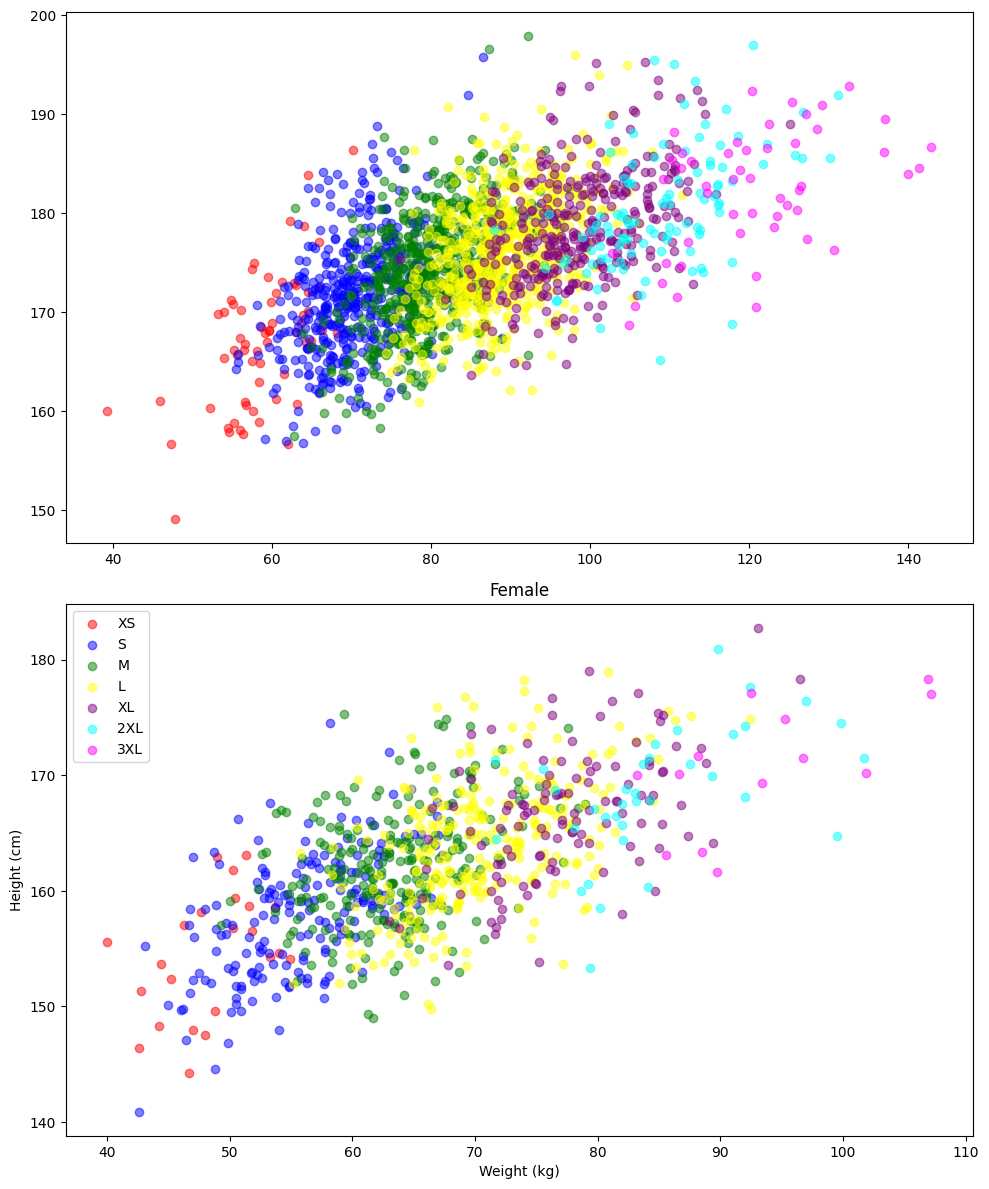

In [44]:
import matplotlib.pyplot as plt
# data charts/visualization
# First let us define a dict to match a t-shirt size to a color

colors = {
    'XS': 'red',
    'S': 'blue',
    'M': 'green',
    'L': 'yellow',
    'XL': 'purple',
    '2XL': 'cyan',
    '3XL': 'magenta'
}

male_dataset = pd.read_csv('./male_sized.csv')
female_dataset = pd.read_csv('./female_sized.csv')
# For male_dataset
male_dataset.loc[:, 'stature'] = male_dataset['stature'] / 10
male_dataset.loc[:, 'weightkg'] = male_dataset['weightkg'] / 10

# For female_dataset
female_dataset.loc[:, 'stature'] = female_dataset['stature'] / 10
female_dataset.loc[:, 'weightkg'] = female_dataset['weightkg'] / 10

# Create plots for each gender
fig, axes = plt.subplots(nrows=2, figsize=(10,12))

for ax, gender_data, gender in zip(axes, [male_dataset, female_dataset], ['Male','Female']):
    for size, color in colors.items():
        # Filter data by size
        size_data = gender_data[gender_data['t-shirt size'] == size]

        # Plot data
        ax.scatter(size_data['weightkg'], size_data['stature'], c=color, label=size, alpha=0.5)

ax.set_title(gender)
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Height (cm)')
ax.legend()

plt.tight_layout()
plt.show()


## Communicate Results

## Identify Potential Anomalies or Outliers

In [50]:
class KNNClassifier:
    def __init__(self, k=5):
        # Constructor for KNNClassifier. Initializes class variables.
        self.k=k
        self.X = None
        self.y = None

    def _calculate_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data point, x1 and x2
        """
        # Calculate the Euclidean distance between two data points x1 and x2.
        return ((x1 -x2)**2).sum() **0.5
    
    def _knn_predict(self, x):
        # Predict the class for a given data point x using KNN.
        return sorted([
            (self._calculate_distance(x, measurment), self.y[i])
            for i, measurment in enumerate(self.X)
        ])[:self.k]
    
    def fit(self, X, y):
        # Train the KNN model with the given training data and labels.
        self.X = np.array(X)
        self.y = np.array(y)
    
    def _predict(self, neighbors):
        # Determine the final prediction based on the majority class of nearest neighbors.
        labels = [n[1] for n in neighbors]
        label, count = np.unique(labels, return_counts=True)
        max_count = np.max(count)
        if np.sum(count == max_count) > 1:
            tied_labels = label[count == max_count]
            # In case of a tie, select the smallest class based on the order in labels
            return min(tied_labels, key=labels.index)
        
        # Otherwise, selct the class with the most votes
        return label[np.argmax(count)]

    def predict(self, X):
        # Make predictions for a given list of data points X.
    # X = [(178,86), (164, 52)]
        predictions = []
        for x in X:
            neighbors = self._knn_predict(x)
            prediction = self._predict(neighbors)
            # Add the prediction to the result list.
            predictions.append(prediction)
        
        return predictions

In [51]:
females_X = [(person['stature'], person['weightkg']) for _, person in female_dataset.iterrows()]
females_y = female_dataset['t-shirt size'].values.tolist()

females_X



[(166.0, 78.2),
 (167.1, 76.0),
 (152.1, 54.5),
 (166.8, 74.2),
 (165.4, 78.1),
 (159.9, 70.9),
 (167.3, 67.2),
 (167.8, 59.5),
 (162.3, 49.1),
 (166.8, 70.3),
 (164.4, 71.5),
 (144.6, 48.8),
 (168.4, 73.0),
 (161.9, 61.0),
 (159.2, 65.8),
 (172.3, 72.8),
 (163.4, 62.7),
 (168.3, 57.8),
 (155.2, 52.4),
 (164.1, 89.4),
 (168.5, 68.9),
 (165.6, 75.8),
 (160.8, 74.8),
 (166.4, 80.6),
 (158.2, 47.7),
 (172.0, 69.6),
 (153.6, 67.8),
 (154.6, 60.7),
 (160.5, 68.9),
 (163.2, 61.7),
 (166.1, 69.5),
 (166.5, 81.5),
 (155.5, 64.5),
 (157.8, 55.7),
 (158.1, 61.4),
 (169.8, 66.8),
 (165.1, 75.7),
 (165.7, 68.2),
 (164.9, 78.6),
 (168.7, 62.2),
 (169.8, 78.2),
 (153.0, 60.8),
 (160.9, 68.6),
 (160.6, 77.3),
 (174.5, 99.8),
 (160.7, 68.3),
 (156.0, 47.1),
 (167.0, 68.5),
 (150.1, 45.0),
 (157.6, 72.1),
 (157.6, 53.6),
 (162.6, 63.9),
 (160.4, 62.8),
 (153.8, 75.2),
 (162.0, 61.3),
 (173.3, 74.2),
 (173.2, 76.7),
 (162.4, 66.1),
 (150.7, 50.5),
 (164.0, 66.6),
 (152.6, 58.1),
 (167.1, 79.7),
 (165.5,

In [52]:
males_X = [(person['stature'], person['weightkg']) for _, person in male_dataset.iterrows()]
males_y = male_dataset['t-shirt size'].values.tolist()


In [53]:
model = KNNClassifier()
#test the prediction by filling height and weight below
person = [(178, 85)]
model.fit(females_X, females_y)
prediction = model.predict(person)
prediction

[np.str_('XL')]

## Test Scikit-learn

In [110]:
# pip install scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#training
#testing

male_X = male_dataset.drop(columns=['chestcircumference', 'biacromialbreadth', 't-shirt size'])
male_y = male_dataset['t-shirt size']

female_X = female_dataset.drop(columns=['chestcircumference', 'biacromialbreadth', 't-shirt size'])
female_y = female_dataset['t-shirt size']

# train questions with 80% data, test with 20%, train answers, test answers
male_X_train, male_X_test, male_y_train, male_y_test = train_test_split(male_X, male_y, test_size=0.05, random_state=42)

sk_clf = KNeighborsClassifier()
sk_clf.fit(male_X_train, male_y_train)




KNeighborsClassifier()

In [111]:
predictions = sk_clf.predict(male_X_test)
predictions

array(['XL', 'M', 'M', 'XL', 'S', 'M', 'XL', 'XL', 'M', 'L', 'M', 'XS',
       'M', 'M', 'S', 'L', 'S', '3XL', 'S', 'L', 'S', 'XL', 'S', 'M', 'S',
       'XL', 'L', 'M', 'L', '2XL', 'M', 'S', 'S', 'L', 'XL', 'M', 'XL',
       'S', 'M', 'M', 'M', 'M', '2XL', '2XL', 'L', 'M', 'M', 'S', 'M',
       'M', 'S', 'S', 'L', 'M', '2XL', 'L', 'L', 'S', 'S', 'L', 'M', 'XL',
       'XL', 'L', 'M', 'L', 'XL', 'L', 'M', 'S', 'L', '3XL', 'S', 'S',
       'XL', 'XL', 'S', 'L', 'M', 'L', 'M', 'S', 'L', 'S', 'XL', 'XS',
       'S', '3XL', 'M', 'S', 'S', 'S', 'M', '2XL', 'L', 'L', 'L', 'S',
       'S', 'L', 'S', 'XL', 'M', 'M', '2XL', 'L', 'XL', 'XS'],
      dtype=object)

In [112]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(male_y_test, predictions)
accuracy




0.6203703703703703